## 1. View tail cases

In [1]:
from mhr.utils.utils import process_jsonl, load_json_file, write_json_file
import random
import math
from tqdm import tqdm
import argparse
random.seed(42)


def build_prob_dict(file_dict,threshold_dict):
    """
    Build a dictionary of probabilities for each entry in the data.
    """
    entry_prob={}
    for key in ['object','token','co_occurrence','what_word']:
        entry_prob[key] = dict()
        data = process_jsonl(file_dict[key]) 
        for item in data:
            # length = len(item['ids']) if len(item['ids']) > threshold_dict[key] else threshold_dict[key]
            length = len(item['ids']) 
            entry_prob[key][item['object']] = threshold_dict[key] / length 

    return entry_prob

threshold_dict = {'object': 304, 'token': 120, 'co_occurrence': 24, 'what_word': 4895}
reverse_index_file_dict = {
    'object': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_dino_stat_reverse_index.jsonl',
    'token': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_token_reverse_index.jsonl',
    'co_occurrence': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_co_occurrence_reverse_index.jsonl',
    'what_word': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_what_word_reverse_index.jsonl'
}
# threshold_dict = {'object': 12, 'token': 566, 'co_occurrence': 4, 'what_word': 3028}
# reverse_index_file_dict = {
#     'object': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/llamaobj_reverse_index.jsonl',
#     'token': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/token_reverse_index.jsonl',
#     'co_occurrence': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/llamacooccur_reverse_index.jsonl',
#     'what_word': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/whatword_reverse_index.jsonl'
# }

# threshold_dict = {'token': 633, 'object': 57, 'co_occurrence': 12, 'what_word': 4895}
# reverse_index_file_dict = {
#     'object': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/dinoobj_reverse_index.jsonl',
#     'token': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/token_reverse_index.jsonl',
#     'co_occurrence': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/dinocooccur_reverse_index.jsonl',
#     'what_word': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_what_word_reverse_index.jsonl'
# }
# # threshold_dict = {'token': 75, 'object': 19,  'co_occurrence': 6, 'what_word': 203}
# threshold_dict = {'token': 210, 'object': 68,  'co_occurrence': 10, 'what_word': 203}
# reverse_index_file_dict = {
#     'object': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/dinoobj_reverse_index.jsonl',
#     'token': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/token_reverse_index.jsonl',
#     'co_occurrence': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/dinocooccur_reverse_index.jsonl',
#     'what_word': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/whatword_reverse_index.jsonl'
# }
# threshold_dict = {'object': 211, 'token': 74, 'co_occurrence': 11, 'what_word': 194}
# reverse_index_file_dict = {
#     'object': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/dinoobj_reverse_index.jsonl',
#     'token': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/token_reverse_index.jsonl',
#     'co_occurrence': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/dinocooccur_reverse_index.jsonl',
#     'what_word': '/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/whatword_reverse_index.jsonl'
# }


In [2]:
# def sample_data_one(threshold_dict, reverse_index_file_dict, input_dataset_file_path ,output_file_path,pass_num=1,key="token"):
# input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reformed_data/origin_data/llava_v1_5_mix665k.json"
# input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/origin_data_full_info/share_pt_llamaobj.json"
input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/origin_data_full_info/share_ft_dinoobj.json"
input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/origin_data_full_info/share_pt_llamaobj.json"
input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/origin_data_full_info/share_ft_dinoobj.json"
input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/llavaft_fullinfo.json"
input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reformed_data/origin_data/llava_v1_5_mix665k.json"
entry_prob = build_prob_dict(reverse_index_file_dict,threshold_dict)
origin_data = load_json_file(input_dataset_file_path)

In [3]:
compose_list = ["token","object","co_occurrence","what_word"]
# compose_list = ["token","object","co_occurrence"]
# compose_list = ["object","co_occurrence"]
pass_num=0

In [4]:
D_star=[]
D_aug=[]
# key="object"
img_dict={}
for item in tqdm(origin_data):
    if item.get("image",None) is None:
        continue
    if img_dict.get(item["image"],None) is None:
        img_dict[item["image"]] = 1
    else:
        img_dict[item["image"]] = img_dict[item["image"]]+1
        
        
prob_item_dict={concept:[] for concept in compose_list}
prob_item_dict["max"]=[]

for item in tqdm(origin_data):
    max_of_prob = 0
    pass_cnt = 0
    for key in compose_list:
        for obj in item['statistics'][key]:
            avg_prob = entry_prob[key].get(obj,0)
            prob_item_dict[key].append({'item':obj,'prob':avg_prob})
        # prob_list = [entry_prob[key].get(obj,0) for obj in item['statistics'][key]]
        # avg_prob = sum(prob_list)/len(prob_list) if len(prob_list) > 0 else 0
            if random.random() < avg_prob:
                pass_cnt += 1
            if avg_prob > max_of_prob:
                max_of_prob = avg_prob
    if pass_cnt > pass_num:
        D_star.append(item)
    if max_of_prob > 1 and item.get("image",None) and img_dict.get(item["image"],1) < 2:
        D_aug.append(item)
        img_dict[item["image"]] = img_dict[item["image"]]+1
    prob_item_dict["max"].append({'item':"-",'prob':max_of_prob})
    


for concept,prob_item_list in prob_item_dict.items():
    prob_item_list = sorted(prob_item_list,key=lambda x:x['prob'],reverse=True)
    
print(f"len(D_star):{len(D_star)}")
print(f"len(D_aug):{len(D_aug)}")
print(f"total length:{len(D_star)+len(D_aug)}")

100%|██████████| 665298/665298 [00:12<00:00, 53571.57it/s]


len(D_star):581894
len(D_aug):221536
total length:803430


In [6]:
from mhr.utils.utils import *
write_jsonl(D_aug,"/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reformed_data/statistics/llavaft_toaug.jsonl")

In [ ]:
prob_item_dict["max"].append({'item':"-",'prob':max_of_prob})
prob_list = [item['prob'] for item in prob_item_dict["max"]]
less_than_5 = 0
for item in prob_list:
    if  item >=1:# item < 5 and
        less_than_5 += 1
print(less_than_5)

In [ ]:
D_star_new=[]
for item in tqdm(D_star):
    if random.random()<0.8:
        D_star_new.append(item)

D_aug_new=[]
for item in tqdm(D_aug):
    if random.random()<0.8:
        D_aug_new.append(item)
        
print(f"len(D_star_new):{len(D_star_new)}")
print(f"len(D_aug_new):{len(D_aug_new)}")
print(f"total length:{len(D_star_new)+len(D_aug_new)}")

In [ ]:
write_json_file(D_aug,"/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/aug/diffaug/tobeaug/share4vft_diff_tobeaug_tocw.json")


In [ ]:
import matplotlib.pyplot as plt
key="max"
draw_data = [x['prob'] for x in prob_item_dict[key] if x['prob'] > 1]
plt.hist(draw_data, bins=range(int(min(draw_data)), int(max(draw_data) + 2),100), align='left')

# 显示直方图
plt.show()

In [ ]:
draw_data

In [ ]:
from IPython.display import display, Image
import IPython

def display_by_index(prob_item_list,index):
    image_dir_path = "/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/"
    image_sub_path = prob_item_list[index]['item']['image']
    print(f"prob: {prob_item_list[index]['prob']} object: {prob_item_list[index]['item']['statistics']['object']} co_occurrence: {prob_item_list[index]['item']['statistics']['co_occurrence']} ")
    
    # for idx,conv in enumerate(prob_item_list[index]['item']['conversations']):
    #     if idx%2 == 0:
    #         character = "user"
    #     else:
    #         character = "assistant"
    #     print(f"{character}: {conv['value']}")
    image_full_path=f"{image_dir_path}{image_sub_path}"
    print(f"image_path: {image_full_path}")
    display(IPython.display.Image(filename=image_full_path))
    

In [ ]:
display_by_index(prob_item_list,14)

## 2. Test Alpha 
Test how many instances will be added into dataset by scaling alpha.

In [ ]:

# input_dataset_file_path = "/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reformed_data/origin_data/llava_v1_5_mix665k.json"
# D_star=[]
# key="object"
# alpha = 0.9
# pass_num = 0
# entry_prob = build_prob_dict(reverse_index_file_dict,threshold_dict)
# origin_data = load_json_file(input_dataset_file_path)

# pass_cnt_list = []
# prob_list = []
# prob_item_list = []
# for item in tqdm(origin_data):
#     pass_flag = 0
#     for key in ['object','token','co_occurrence','what_word']:
#         for obj in item['statistics'][key]:
#             prob = entry_prob[key].get(obj,0)
#             # assert prob is not None, f"key: {key}, obj: {obj}"
#             prob_list.append(prob)
#             prob_item_list.append({'item':item,'prob':prob})
#             if random.random() < prob:
#                 pass_flag += 1
#                 break
#     if pass_flag > pass_num and random.random() < alpha:
#         D_star.append(item)

# prob_item_list = sorted(prob_item_list,key=lambda x:x['prob'],reverse=True)
# print(f"length of D_star: {len(D_star)}")
# print(f"max of prob: {max(prob_list)}")
# print(f"min of prob: {min(prob_list)}")
# print(f"average of prob: {sum(prob_list)/len(prob_list)}")

## 3. Test diffusion models

In [1]:
import os
import torch
import argparse
from PIL import Image
from torchvision import transforms
from accelerate import Accelerator
from diffusers import StableDiffusionImageVariationPipeline
from torch.utils.data import Dataset
import random
import shutil

/mnt/petrelfs/songmingyang/anaconda3/envs/smoe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.__version__
class Dataset_ImageNetR(Dataset):
    def __init__(self, root, transform):
        self.root = root
        self.transform = transform
        self.folders = os.listdir(self.root)
        self.folders.sort()
        self.images = []
        for folder in self.folders:
            if not os.path.isdir(os.path.join(self.root, folder)):
                continue
            class_images = os.listdir(os.path.join(self.root, folder))
            class_images = list(map(lambda x: os.path.join(folder, x), class_images))
            random.shuffle(class_images)
            class_image = class_images[0:5]
            self.images  = self.images + class_image

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.transform(Image.open(os.path.join(self.root, self.images[idx])).convert('RGB'))
        return self.images[idx], image

In [3]:

def generate_images(pipe, dataloader, args):
    # pipe, dataloader = accelerator.prepare(pipe, dataloader)
    pipe.safety_checker = lambda images, clip_input: (images, False)
    pipe = pipe.to('cuda')
    with torch.no_grad():
        for count, (image_locations, original_images) in enumerate(dataloader):
            print(f'{count} / {len(dataloader)}, {image_locations[0]}.')

            for image_lo in image_locations:
                os.makedirs(os.path.join(args.save_image_gen, os.path.dirname(image_lo)), exist_ok = True)
                source_path = os.path.join(args.data_dir, image_lo)
                dist_path = os.path.join(args.save_image_gen, image_lo)
                
                if not os.path.exists(dist_path):
                    shutil.copyfile(source_path, dist_path)
                    with open(os.path.join(args.save_image_gen, 'selected_data_list.txt'), 'a+') as f:
                        f.write(dist_path+'\n')

            for time_ in range(args.dfu_times):
                images = pipe(original_images, guidance_scale = 3).images
                for index in range(len(images)):
                    # print(image_locations[index].split('.')[0]+'_'+str(126+time_)+'.'+image_locations[index].split('.')[1])
                    images[index].save(os.path.join(args.save_image_gen, image_locations[index].split('.')[0]+'_'+str(time_)+'.'+image_locations[index].split('.')[1]))



model_name_path = "/mnt/petrelfs/songmingyang/songmingyang/model/mm/sd-image-variations-diffusers"
pipe = StableDiffusionImageVariationPipeline.from_pretrained(model_name_path, revision = "v2.0")

tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
    [0.48145466, 0.4578275, 0.40821073],
    [0.26862954, 0.26130258, 0.27577711]),
])
pipe = pipe.to('cuda')
print("prepare  done!")



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]An error occurred while trying to fetch /mnt/petrelfs/songmingyang/songmingyang/model/mm/sd-image-variations-diffusers/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /mnt/petrelfs/songmingyang/songmingyang/model/mm/sd-image-variations-diffusers/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:02,  1.99it/s]An error occurred while trying to fetch /mnt/petrelfs/songmingyang/songmingyang/model/mm/sd-image-variations-diffusers/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /mnt/petrelfs/songmingyang/songmingyang/model/mm/sd-image-variations-diffusers/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


prepare  done!


100%|██████████| 50/50 [00:03<00:00, 12.98it/s]


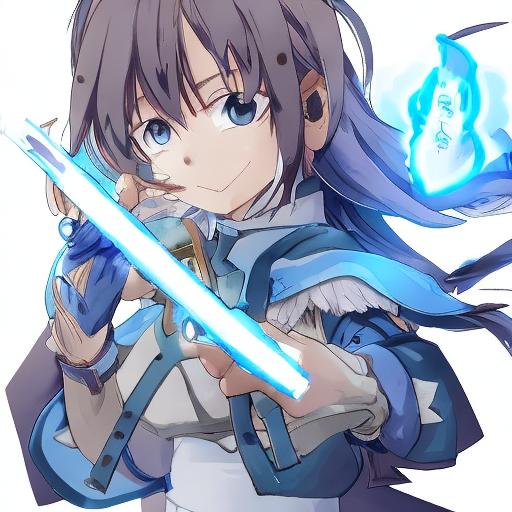

In [4]:
input_image_path="./roxy.jpeg"
image = tform(Image.open(input_image_path).convert('RGB'))
images = pipe(image.unsqueeze(0), guidance_scale = 3).images
display(images[0])

In [2]:
import random
random.seed(42)
input_image_path="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000214413.jpg"
input_image_path2="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000145188.jpg"
input_image_path3="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000067615.jpg"
input_image_paths = [input_image_path,input_image_path2,input_image_path3]
original_images=[Image.open(img).convert('RGB') for img in input_image_paths]
images = [tform(img) for img in original_images]
images = torch.stack(images)

res_images = pipe(images, guidance_scale = 3).images

display(res_images[0])

NameError: name 'tform' is not defined

In [3]:
len(res_images)

NameError: name 'res_images' is not defined

In [10]:
input_image_path="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000214413.jpg"
original_image=Image.open(input_image_path).convert('RGB')
image = tform(original_image)

res_list=[original_image]
for i in range(5):
    images = pipe(image.unsqueeze(0), guidance_scale = 3).images
    res_list.append(images[0])
# res_list = torch.stack(res_list)

display(images[0])

NameError: name 'Image' is not defined

In [8]:

def select_confident_samples_cosine(logits, selection_cosine, selection_selfentro):
    cosine_distan = [torch.nn.CosineSimilarity(dim=0)(logits[0], logits[i]) for i in range(1, logits.shape[0])]
    cosine_distan = torch.stack(cosine_distan)
    idx_cosine = torch.argsort(cosine_distan, descending=True)[:int(cosine_distan.size()[0] * selection_cosine)]
    # idx
    for i in range(idx_cosine.shape[0]):
        idx_cosine[i] +=1
    logits_cos = logits[idx_cosine]
    logits = torch.cat((logits[0, :].unsqueeze(0), logits_cos), dim=0)

    batch_entropy = -(logits.softmax(1) * logits.log_softmax(1)).sum(1)
    idx = torch.argsort(batch_entropy, descending=False)[:int(batch_entropy.size()[0] * selection_selfentro)]

    return logits[idx], [idx_cosine, idx], cosine_distan

In [5]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
clip_path="/mnt/petrelfs/songmingyang/songmingyang/model/others/clip-vit-large-patch14-336"
processor = AutoProcessor.from_pretrained(clip_path)
model = AutoModelForZeroShotImageClassification.from_pretrained(clip_path)

In [6]:
import random
random.seed(42)
input_image_path="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000214413.jpg"
input_image_path2="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000145188.jpg"
input_image_path3="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000067615.jpg"
input_image_paths = [input_image_path,input_image_path2,input_image_path3]
original_images=[Image.open(img).convert('RGB') for img in input_image_paths]
# processed=processor(images=res_list,text=[""]*len(res_list),return_tensors="pt")
processed=processor(images=original_images,return_tensors="pt")
res_logits = model.get_image_features(**processed)

In [7]:
cos_res = select_confident_samples_cosine(res_logits,1,0.3)
cos_res[1]

NameError: name 'select_confident_samples_cosine' is not defined

In [8]:
import os
output_dir="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/llava_aug/aug_ft_200k"
output_list = os.listdir(output_dir)
print(len(output_list))

215790


In [9]:
res_logits.shape

torch.Size([3, 768])

In [19]:
len(res_list)

6

In [20]:
processed["pixel_values"].shape

torch.Size([6, 3, 336, 336])

In [21]:
processed.keys()

dict_keys(['pixel_values'])

In [4]:
a = torch.load("/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/latent/llavaft/latent_reps/llavaft_imageresps.pt")

In [5]:
len(a)

349056

In [ ]:
#### extract text features

In [54]:
import random
random.seed(42)
input_image_path="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000214413.jpg"
input_image_path2="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000145188.jpg"
input_image_path3="/mnt/petrelfs/songmingyang/songmingyang/data/mm/imgs/coco/train2017/000000067615.jpg"
input_image_paths = [input_image_path,input_image_path2,input_image_path3]
original_images=[Image.open(img).convert('RGB') for img in input_image_paths]
# processed=processor(images=res_list,text=[""]*len(res_list),return_tensors="pt")
processed=processor(images=original_images,return_tensors="pt")
res_logits = model.get_image_features(**processed)

In [55]:
text = ["this is an image featuring a bus","this is a pasta","a train"]
processed=processor.tokenizer(text,return_tensors="pt",padding=True)

res_logits_txt = model.get_text_features(**processed)

In [56]:
res_logits_txt.shape

torch.Size([3, 768])

In [57]:
res_logits.shape

torch.Size([3, 768])

In [58]:
together_processed = processor(images=original_images,return_tensors="pt",text=text,padding=True)
output = model(**together_processed)
logits_per_image = output.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
print("prob:",probs)

prob: tensor([[9.9985e-01, 2.5079e-06, 1.4736e-04],
        [4.8800e-03, 9.7995e-01, 1.5173e-02],
        [2.1487e-01, 5.3938e-03, 7.7974e-01]], grad_fn=<SoftmaxBackward0>)


NameError: name 'image_feature_norm' is not defined

In [77]:

image_feature_norm = res_logits / res_logits.norm(dim=-1).unsqueeze(1)
text_feature_norm = res_logits_txt / res_logits_txt.norm(dim=-1).unsqueeze(1)

# similarity = torch.dot(image_feature_norm, text_feature_norm)

my_logits=torch.matmul(image_feature_norm, text_feature_norm.T)*100
my_logits

tensor([[21.7300,  8.8341, 12.9075],
        [10.2079, 15.5102, 11.3423],
        [11.4731,  7.7883, 12.7620]], grad_fn=<MulBackward0>)

tensor([17.7014, 18.6805, 16.6555], grad_fn=<LinalgVectorNormBackward0>)

In [78]:
logits_per_image

tensor([[21.7300,  8.8341, 12.9075],
        [10.2079, 15.5102, 11.3423],
        [11.4731,  7.7883, 12.7620]], grad_fn=<TBackward0>)

In [79]:
probs = logits_per_image.softmax(dim=1)
probs

tensor([[9.9985e-01, 2.5079e-06, 1.4736e-04],
        [4.8800e-03, 9.7995e-01, 1.5173e-02],
        [2.1487e-01, 5.3938e-03, 7.7974e-01]], grad_fn=<SoftmaxBackward0>)

In [80]:
probs = my_logits.softmax(dim=1)
probs

tensor([[9.9985e-01, 2.5079e-06, 1.4736e-04],
        [4.8800e-03, 9.7995e-01, 1.5174e-02],
        [2.1487e-01, 5.3938e-03, 7.7974e-01]], grad_fn=<SoftmaxBackward0>)

In [117]:
processed=processor.tokenizer(text[0],return_tensors="pt",padding=True)['input_ids'][0]
processed2 = processor.tokenizer(text[1],return_tensors="pt",padding=True)['input_ids'][0]
processed3 = processor.tokenizer(text[2],return_tensors="pt",padding=True)['input_ids'][0]
txt_processed = processor.tokenizer(text,return_tensors="pt",padding=True)

In [123]:
input_ids = torch.nn.utils.rnn.pad_sequence(
            [processed,processed2,processed3],
            batch_first=True,
            padding_value=tokenizer.pad_token_id)
attention_mask = input_ids.ne(tokenizer.pad_token_id).to(torch.long)
# 遍历每一行，找到第一个 False 并将其改为 True
for i in range(attention_mask.shape[0]):
    false_indices = (attention_mask[i] == False).nonzero(as_tuple=True)[0]  # 找到第一个 False 的位置
    if len(false_indices) > 0:  # 如果存在 False
        attention_mask[i, false_indices[0]] = True  # 将第一个 False 改为 True

input_ids,attention_mask,txt_processed["input_ids"],txt_processed["attention_mask"]

(tensor([[49406,   589,   533,   550,  2867,  3706,   320,  2840, 49407],
         [49406,   589,   533,   320, 10441, 49407, 49407, 49407, 49407],
         [49406,   320,  3231, 49407, 49407, 49407, 49407, 49407, 49407]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 0, 0]]),
 tensor([[49406,   589,   533,   550,  2867,  3706,   320,  2840, 49407],
         [49406,   589,   533,   320, 10441, 49407, 49407, 49407, 49407],
         [49406,   320,  3231, 49407, 49407, 49407, 49407, 49407, 49407]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 0, 0]]))

In [112]:
res_logits_txt = model.get_text_features(input_ids=input_ids,attention_mask=attention_mask)
res_logits_txt

tensor([[ 0.0495,  0.4085,  0.1550,  ...,  0.0859,  0.3439, -0.2770],
        [ 0.1716,  0.4994,  0.0256,  ...,  0.1051,  0.3434, -0.2704]],
       grad_fn=<MmBackward0>)

In [83]:
tokenizer = processor.tokenizer

In [89]:
tokenizer.special_tokens_map

{'bos_token': '<|startoftext|>',
 'eos_token': '<|endoftext|>',
 'unk_token': '<|endoftext|>',
 'pad_token': '<|endoftext|>'}

In [95]:
tokenizer.bos_token_id

49406

In [21]:
from transformers import CLIPConfig,CLIPTextConfig
tokenizer = processor.tokenizer
new_max_length = 256
tokenizer.model_max_length = new_max_length
text="The model is intended as a research output for research communities. We hope that this model will enable researchers to better understand and explore zero-shot, arbitrary image classification. We also hope it can be used for interdisciplinary studies of the potential impact of such models - the CLIP paper includes a discussion of potential downstream impacts to provide an example for this sort of analysis. Any deployed use case of the model - whether commercial or not - is currently out of scope. Non-deployed use cases such as image search in a constrained environment, are also not recommended unless there is thorough in-domain testing of the model with a specific, fixed class taxonomy. This is because our safety assessment demonstrated a high need for task specific testing especially given the variability of CLIP’s performance with different class taxonomies. This makes untested and unconstrained deployment of the model in any use case currently potentially harmful."
txt_processed = processor.tokenizer(text,return_tensors="pt",padding=True, truncation=True, max_length=new_max_length)
config = CLIPConfig.from_pretrained(clip_path)
config.text_config.max_position_embeddings=512
# outputs = model.get_text_features(**txt_processed)

In [23]:
model = AutoModelForZeroShotImageClassification.from_pretrained(clip_path,config=config,ignore_mismatched_sizes=True)

Some weights of CLIPModel were not initialized from the model checkpoint at /mnt/petrelfs/songmingyang/songmingyang/model/others/clip-vit-large-patch14-336 and are newly initialized because the shapes did not match:
- text_model.embeddings.position_embedding.weight: found shape torch.Size([77, 768]) in the checkpoint and torch.Size([512, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [1]:
import torch
a = torch.load("/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/latent/llavaft/latent_reps/llavaft_imageresps.pt")
a[0].keys()

dict_keys(['id', 'image_path', 'features', 'show_time'])

In [2]:
b= torch.load("/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/latent/llavaft/latent_reps/llavaft_textresps.pt")
b[0].keys()

dict_keys(['id', 'image_path', 'features', 'new_idx'])

In [3]:
len(b)

349034